# Recognizing handwritten signatures
We hope to distinguish between real and forged handwritten signatures.

In [1]:
# import required modules, packages
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# import datasets, classifiers, performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

NOTE: we will be using square shape (200, 200) to resize for now
\
There are a lot of subfolders so I'm not sure how to go through multiple datasets yet

In [2]:
# accessing the dataset
from PIL import Image, ImageOps

p = Path("sample_Signature/")
dirs = p.glob("*")
labels_dict = {'forge':0, 'genuin':1}

image_data = []
labels = []

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]

    for img_path in folder_dir.glob("*.png"):
        # reading/opens each image
        img = Image.open(img_path)
        if 'L' in img.getbands():  # image is black-and-white, colorize it
            img = ImageOps.colorize(img, black="blue", white="white")
        # resizing each image
        img_new = img.resize((200,200))
        # convert each image to array using numpy
        img_array = np.asarray(img_new)
        # append each image array to image_data list
        image_data.append(img_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])

        # image color inversion
        from skimage import util
        import numpy as np
        color_inversion_img = util.invert(img_array)
        # alternate method with numpy
        #color_inversion_img_w_np = np.invert(img)
        img_invert_array = np.asarray(color_inversion_img)
        # append each image array to image_data list
        image_data.append(img_invert_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])

In [3]:
# both print statements should return the same value, one label for each image
print(len(image_data))
print(len(labels))

600
600


In [4]:
# Converting image data into numpy array
image_data = np.array(image_data, dtype = 'float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(600, 200, 200, 3) (600,)


In [5]:
# randomly shuffle data (so we get both fake and real signatures)
import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

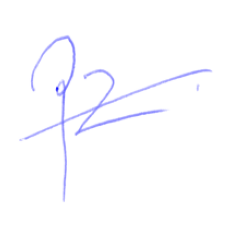

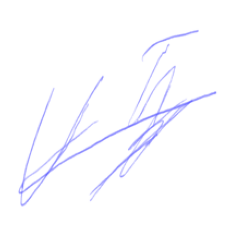

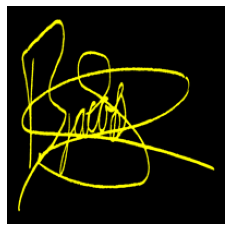

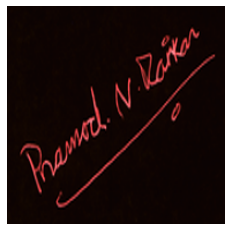

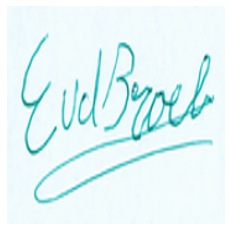

In [6]:
# visualize data
def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

# 10 example visualizations
for i in range(5):
    drawImg(image_data[i])

# Classification
modified based on scikit-learn 'recognizing handwritten digits' example

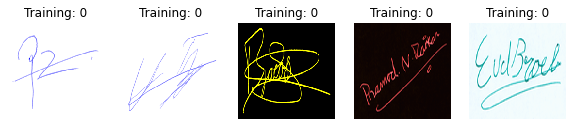

In [7]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))

# OG example used 'digits.images' and 'digits.target' instead of 'image_data' and 'labels'
for ax, image, label in zip(axes, image_data, labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [8]:
# to use a classifier, first need to flatten images, convert to grayscale

# flatten images
n_samples = len(image_data)
data = image_data.reshape((n_samples, -1))

# create a classifier: support vector classifier
clf = svm.SVC(gamma = 0.001)

# split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size =0.5, shuffle = False)

# learn the signatures on the train subset
clf.fit(X_train, y_train)

# predict the signature (forge or real) on the test subset
predicted = clf.predict(X_test)

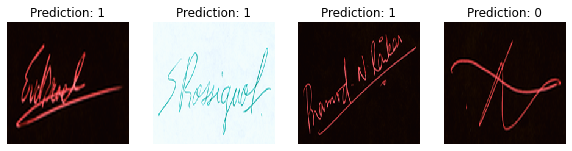

In [9]:
# take samples to predict and visualize
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(200, 200, 3)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [10]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       135
           1       0.59      0.61      0.60       165

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300




# Seralization
### loading the model into memory
\
follows the example website Jason gave

In [14]:
import joblib
joblib.dump(clf, '2021-09-04-SVC.pkl')

['2021-09-04-SVC.pkl']

# Deserialization
### loading the model back into your workspace

In [15]:
clf = joblib.load('2021-09-04-SVC.pkl')